Import necessary module


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix


from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn import preprocessing

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#Dataset Import

In [ ]:
encodedData = pd.read_csv("/content/encodedData.csv")

# Duplicity dropping

In [ ]:
encodedData.duplicated().sum()

9

In [ ]:
encodedData = encodedData.drop_duplicates()

# Null Value Check

In [ ]:
nullValueCheck = pd.notnull(encodedData)
encodedData[nullValueCheck]

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,Financials of family,Addicted person in family,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
0,2.000000,1.000000,4.0,2.000000,1.00000,3.0,1.0,1.000000,1.000000,1.00000,3.0,2.000000,2.000000,2.00000,2.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2
1,2.000000,1.000000,3.0,1.000000,3.00000,2.0,1.0,1.000000,2.000000,1.00000,2.0,2.000000,1.000000,2.00000,2.0,2.000000,1.000000,1.000000,1.000000,3.0,1.000000,3
2,1.000000,1.000000,3.0,1.000000,1.00000,2.0,1.0,1.000000,1.000000,2.00000,2.0,2.000000,1.000000,2.00000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,2.000000,2
3,2.000000,1.000000,4.0,1.000000,2.00000,2.0,1.0,1.000000,2.000000,2.00000,3.0,2.000000,1.000000,1.00000,2.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2
4,2.000000,1.000000,4.0,1.000000,2.00000,3.0,2.0,1.000000,2.000000,1.00000,2.0,2.000000,1.000000,1.00000,2.0,2.000000,1.000000,2.000000,2.000000,2.0,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2.000000,1.000000,4.0,2.000000,2.00000,2.0,2.0,4.934642,2.000000,1.00000,2.0,2.000000,1.967321,1.00000,2.0,1.032679,1.000000,1.000000,1.967321,1.0,1.000000,3
436,1.000000,1.400013,3.0,1.400013,2.00000,2.0,2.0,1.000000,1.400013,2.00000,2.0,1.599987,1.599987,1.00000,2.0,1.000000,1.400013,1.000000,1.000000,1.0,1.400013,3
437,2.969459,2.000000,4.0,1.000000,2.00000,2.0,1.0,2.000000,1.969459,2.00000,3.0,1.000000,1.969459,1.00000,1.0,1.000000,2.000000,1.969459,1.000000,2.0,1.000000,3
438,2.140395,2.000000,4.0,1.000000,2.00000,2.0,1.0,2.000000,1.140395,2.00000,3.0,1.000000,1.140395,1.00000,1.0,1.000000,2.000000,1.140395,1.000000,2.0,1.000000,3


# Int conversion

In [ ]:
cols = ['Age']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Gender']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Education']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Live with']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Motive about drug']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Spend most time']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Failure in life']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Mental/emotional problem']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Suicidal thoughts']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Family relationship']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Financials of family']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Addicted person in family']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Withdrawal symptoms']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Satisfied with workplace']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Case in court']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Living with drug user']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Smoking']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Ever taken drug']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Friends influence']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['If chance given to taste drugs']
encodedData[cols] = encodedData[cols].applymap(np.int64)

cols = ['Easy to control use of drug']
encodedData[cols] = encodedData[cols].applymap(np.int64)

# Dataset Description

In [ ]:
encodedData.shape

(431, 22)

In [ ]:
encodedData.describe()

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,Financials of family,Addicted person in family,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,1.786543,1.215777,3.580046,1.290023,2.153132,1.911833,1.343387,2.030162,1.526682,1.526682,2.380510,1.844548,1.389791,1.334107,1.770302,1.473318,1.515081,1.276102,1.412993,1.584687,1.183295,2.475638
std,0.610684,0.411839,0.773077,0.454300,0.562166,0.502666,0.475391,1.181847,0.499868,0.620283,0.875502,0.507123,0.488270,0.472225,0.421128,0.552885,0.752750,0.447587,0.492944,0.735573,0.387358,1.115946
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000
max,4.000000,2.000000,5.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,4.000000


In [ ]:
encodedData.corr()

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,Financials of family,Addicted person in family,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
Age,1.000000,0.063354,0.198834,-0.120019,0.027694,-0.031147,0.060813,0.211941,0.072029,-0.150693,0.039177,0.005244,0.201696,-0.203721,-0.028324,0.120848,0.012078,-0.064650,-0.038663,0.040336,-0.070164,-0.082723
Gender,0.063354,1.000000,-0.043419,0.149503,0.168337,-0.098862,-0.022985,0.005709,-0.112757,-0.163696,0.003951,-0.184206,0.054927,-0.096523,-0.263323,0.153011,0.563351,0.445634,0.258795,0.273479,-0.015254,0.196159
Education,0.198834,-0.043419,1.000000,0.003272,0.169721,-0.167317,0.159166,0.108074,0.260758,-0.342734,0.422188,0.070371,-0.015081,-0.086169,0.453057,0.041735,0.092833,0.080480,0.151049,-0.074315,-0.099589,0.288680
Live with,-0.120019,0.149503,0.003272,1.000000,0.126194,0.061315,0.119273,0.083291,0.124577,-0.138937,-0.155318,-0.015832,0.139187,0.143489,0.069436,-0.038560,0.153791,0.268623,0.211596,0.110751,0.080457,0.089657
Motive about drug,0.027694,0.168337,0.169721,0.126194,1.000000,-0.034408,0.168264,0.098041,0.283356,-0.198484,-0.019438,0.051064,0.078571,-0.131851,0.306092,0.327431,0.423188,0.395368,0.383874,0.300379,-0.118516,0.447095
Spend most time,-0.031147,-0.098862,-0.167317,0.061315,-0.034408,1.000000,-0.213629,-0.081635,-0.194235,0.365579,-0.235370,0.110323,-0.077583,0.104791,-0.095891,0.041723,-0.082523,-0.149963,-0.087343,-0.011208,-0.119853,-0.177962
Failure in life,0.060813,-0.022985,0.159166,0.119273,0.168264,-0.213629,1.000000,0.180205,0.294093,-0.251969,0.149101,0.038653,0.163418,-0.118591,0.301969,0.114572,0.160961,0.154510,0.276649,0.169364,0.099420,0.362115
Mental/emotional problem,0.211941,0.005709,0.108074,0.083291,0.098041,-0.081635,0.180205,1.000000,0.268288,-0.088340,0.040576,0.128128,0.148841,-0.088937,0.009280,0.116904,0.092287,0.010598,0.046429,0.014443,-0.108623,-0.037353
Suicidal thoughts,0.072029,-0.112757,0.260758,0.124577,0.283356,-0.194235,0.294093,0.268288,1.000000,-0.154185,0.088340,0.176947,0.214553,0.011406,0.443462,0.189810,0.142625,0.190475,0.181687,0.134568,0.016720,0.283619
Family relationship,-0.150693,-0.163696,-0.342734,-0.138937,-0.198484,0.365579,-0.251969,-0.088340,-0.154185,1.000000,-0.130081,0.098238,-0.011384,0.223558,-0.230213,-0.084380,-0.223750,-0.298834,-0.309931,-0.202473,0.052190,-0.282112


# Data Visualization

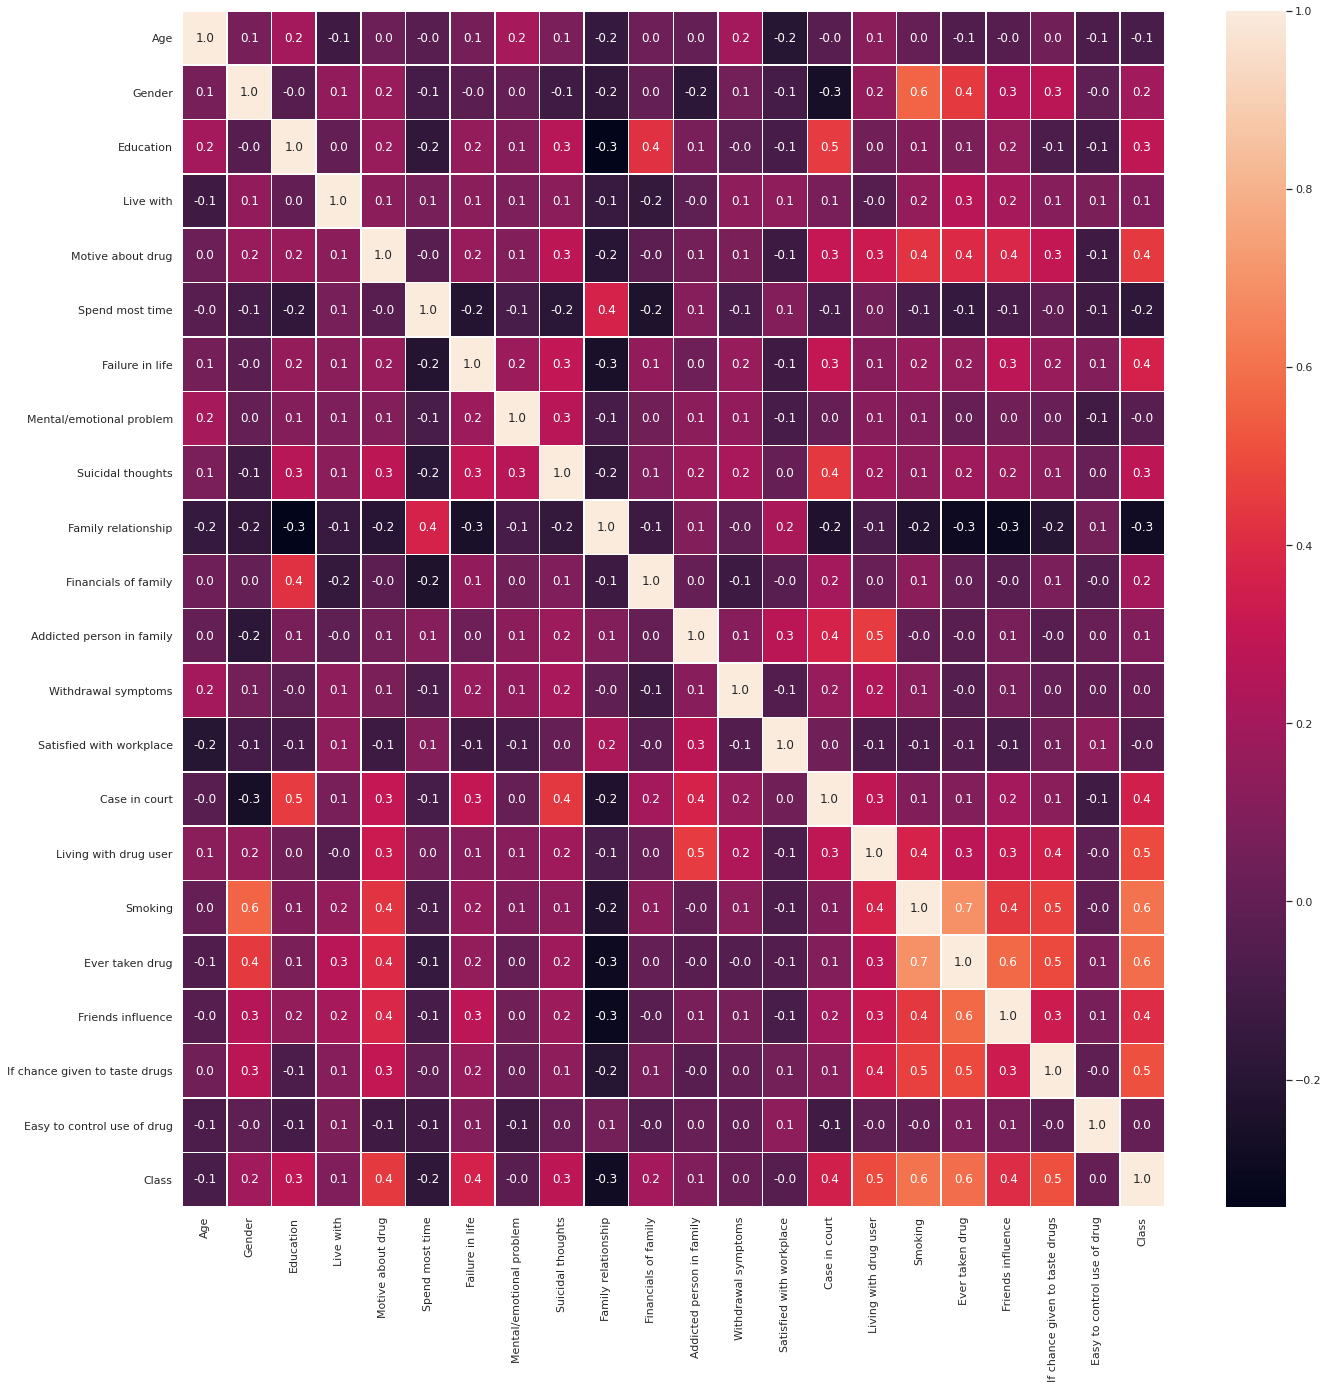

In [ ]:
corr = encodedData.corr()
f,ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
px.histogram(encodedData, x='Suicidal thoughts', color = encodedData['Suicidal thoughts'], barmode='group')

In [ ]:
fig = px.scatter(encodedData, x="Age", y="Education", color="Suicidal thoughts")
fig.show()

In [ ]:
fig = px.density_heatmap(encodedData, x="Smoking", y="Suicidal thoughts", marginal_x="rug", marginal_y="histogram")
fig.show()

# Feature Vs Target variable selection

In [ ]:
from sklearn import preprocessing

X = encodedData.drop('Suicidal thoughts',axis=1).values
y = encodedData['Suicidal thoughts'].values

# Data Normalization

In [ ]:
sc = StandardScaler((0,1))
X_std = sc.fit_transform(X)

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_std, y, test_size=.20, random_state=49)

# ML Algorithms

**Naive_Bayes**

              precision    recall  f1-score   support

           1       0.82      0.73      0.77        44
           2       0.75      0.84      0.79        43

    accuracy                           0.78        87
   macro avg       0.79      0.78      0.78        87
weighted avg       0.79      0.78      0.78        87



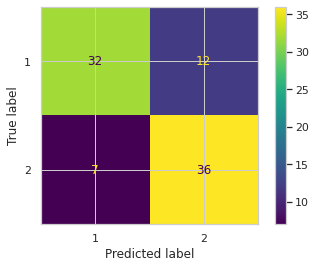

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

NBC = GaussianNB()
NBC.fit(xtrain, ytrain)

yfit = NBC.predict(xtest)
print(classification_report(ytest, yfit))

plot_confusion_matrix(NBC, xtest, ytest)
plt.show()

***ROC Curve of NBC***

0.8493657505285412


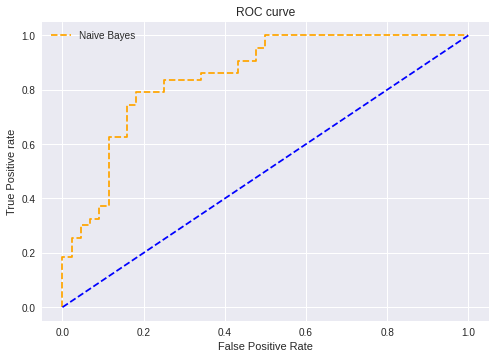

In [ ]:
pred_prob1 = NBC.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**KNN Classifier**

              precision    recall  f1-score   support

           1       0.84      0.93      0.88        44
           2       0.92      0.81      0.86        43

    accuracy                           0.87        87
   macro avg       0.88      0.87      0.87        87
weighted avg       0.88      0.87      0.87        87



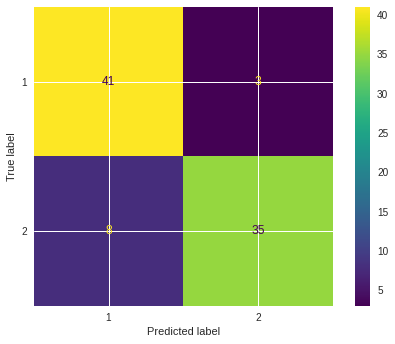

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(xtrain, ytrain)

yfit = KNN.predict(xtest)
print(classification_report(ytest, yfit))

plot_confusion_matrix(KNN, xtest, ytest)
plt.show()

***ROC Curve of KNN***

0.9267970401691332


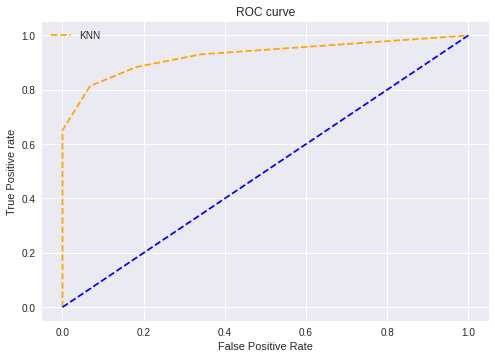

In [ ]:
pred_prob1 = KNN.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Linear_svc**

              precision    recall  f1-score   support

           1       0.81      0.66      0.73        44
           2       0.71      0.84      0.77        43

    accuracy                           0.75        87
   macro avg       0.76      0.75      0.75        87
weighted avg       0.76      0.75      0.75        87



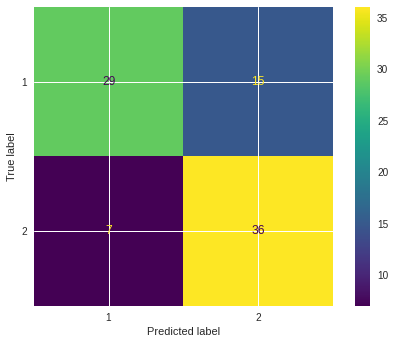

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear', probability=True)
svclassifier.fit(xtrain, ytrain)

yfit = svclassifier.predict(xtest)

print(classification_report(ytest, yfit))

plot_confusion_matrix(svclassifier, xtest, ytest)
plt.show()

***ROC Curve of L_SVC***

0.8218816067653277


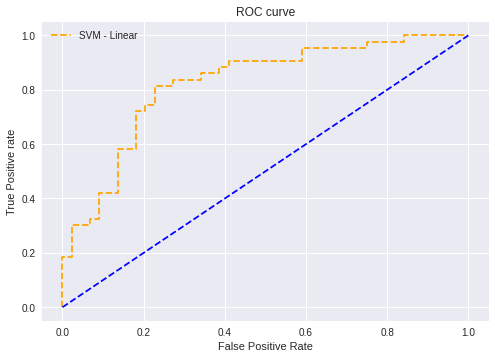

In [ ]:
pred_prob1 = svclassifier.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM - Linear')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Non-Linear_SVC**

              precision    recall  f1-score   support

           1       0.85      0.80      0.82        44
           2       0.80      0.86      0.83        43

    accuracy                           0.83        87
   macro avg       0.83      0.83      0.83        87
weighted avg       0.83      0.83      0.83        87



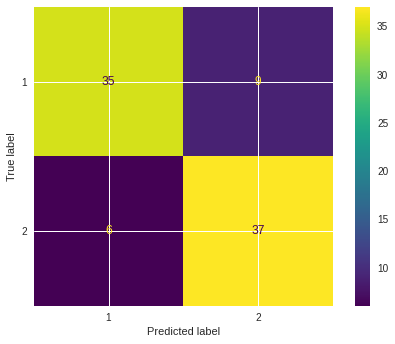

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='rbf', probability=True)
svclassifier.fit(xtrain, ytrain)

yfit = svclassifier.predict(xtest)

print(classification_report(ytest, yfit))

plot_confusion_matrix(svclassifier, xtest, ytest)
plt.show()

***ROC Curve of Non-Linear_SVC***

0.9408033826638478


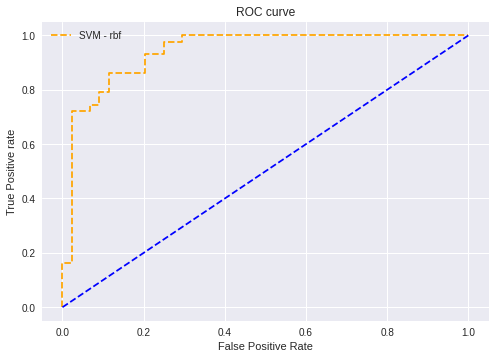

In [ ]:
pred_prob1 = svclassifier.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM - rbf')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**RandomForestClassifier**

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        43
           2       0.87      0.87      0.87        45

    accuracy                           0.86        88
   macro avg       0.86      0.86      0.86        88
weighted avg       0.86      0.86      0.86        88



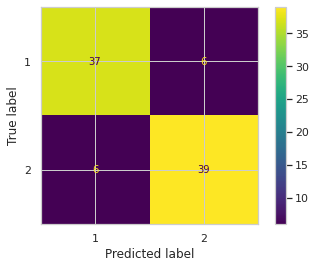

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier()
RFclassifier.fit(xtrain,ytrain)

yfit = RFclassifier.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest, yfit))

plot_confusion_matrix(RFclassifier, xtest, ytest)
plt.show()

#ModelBuild

In [ ]:
SingleValuePredict = np.array([2,1,4,2,1,3,1,1,1,3,2,2,2,2,1,1,1,1,1,1,2]).reshape(1, -1)
sc = StandardScaler((0,1))
SingleValuePredict = sc.fit_transform(SingleValuePredict)

In [ ]:
prediction = RFclassifier.predict(SingleValuePredict)

In [ ]:
prediction

array([1])

***ROC Curve of RF***

0.9659090909090908


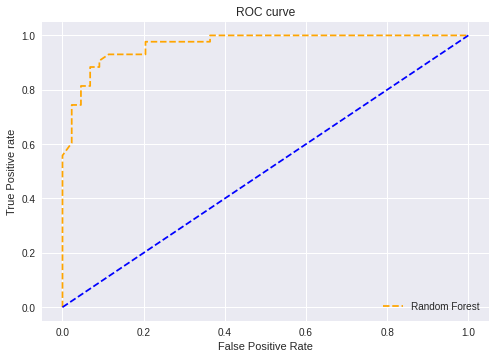

In [ ]:
pred_prob1 = RFclassifier.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**DecisionTreeClassifier**

              precision    recall  f1-score   support

           1       0.86      0.84      0.85        44
           2       0.84      0.86      0.85        43

    accuracy                           0.85        87
   macro avg       0.85      0.85      0.85        87
weighted avg       0.85      0.85      0.85        87



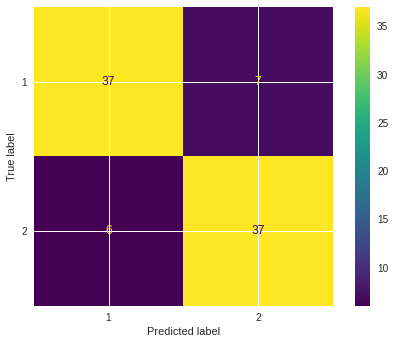

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree =  DecisionTreeClassifier()
DecisionTree.fit(xtrain,ytrain)

yfit = DecisionTree.predict(xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

plot_confusion_matrix(DecisionTree, xtest, ytest)
plt.show()

***ROC Curve of D_Tree***

0.8506871035940803


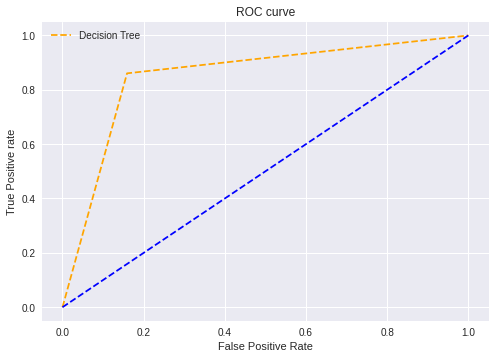

In [ ]:
pred_prob1 = DecisionTree.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**LogisticRegression**

              precision    recall  f1-score   support

           1       0.79      0.68      0.73        44
           2       0.71      0.81      0.76        43

    accuracy                           0.75        87
   macro avg       0.75      0.75      0.75        87
weighted avg       0.75      0.75      0.75        87



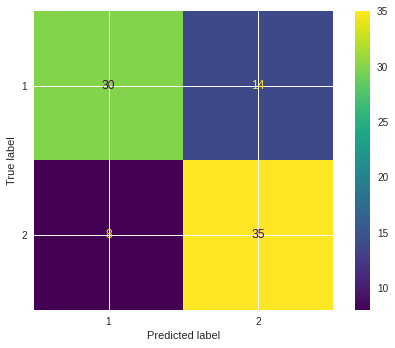

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg', random_state=0)
LR.fit(xtrain, ytrain)

yfit = LR.predict(xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

plot_confusion_matrix(LR, xtest, ytest)
plt.show()

***ROC Curve of LR***

0.8393234672304439


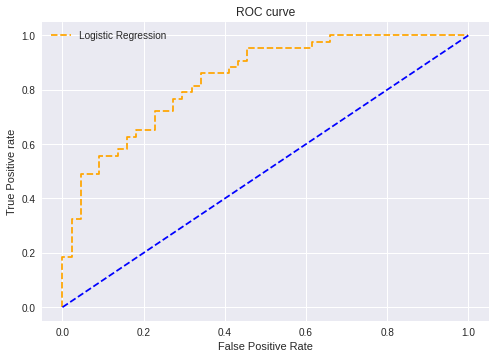

In [ ]:
pred_prob1 = LR.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**XGBClassifier**

              precision    recall  f1-score   support

           1       0.86      0.84      0.85        44
           2       0.84      0.86      0.85        43

    accuracy                           0.85        87
   macro avg       0.85      0.85      0.85        87
weighted avg       0.85      0.85      0.85        87



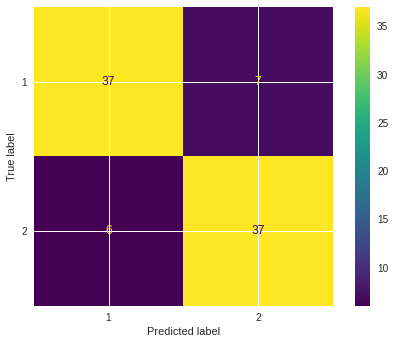

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(xtrain, ytrain)

yfit = model.predict(xtest)


print(classification_report(ytest, yfit))

plot_confusion_matrix(model, xtest, ytest)
plt.show()

***ROC Curve of XGB***

0.9286469344608879


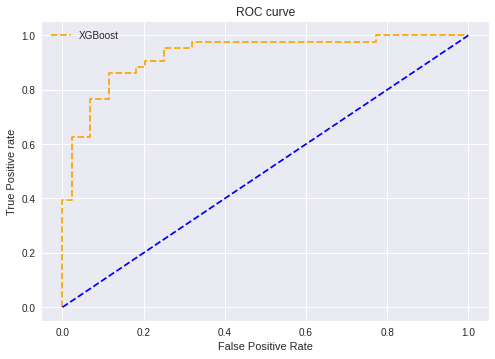

In [ ]:
pred_prob1 = model.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**AdaBoostClassifier**

              precision    recall  f1-score   support

           1       0.75      0.68      0.71        44
           2       0.70      0.77      0.73        43

    accuracy                           0.72        87
   macro avg       0.73      0.72      0.72        87
weighted avg       0.73      0.72      0.72        87



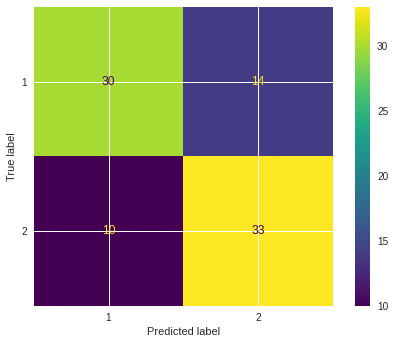

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier()

ADA.fit(xtrain, ytrain)

yfit = ADA.predict(xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

plot_confusion_matrix(ADA, xtest, ytest)
plt.show()

***ROC Curve of Ada_Boost***

0.8562367864693446


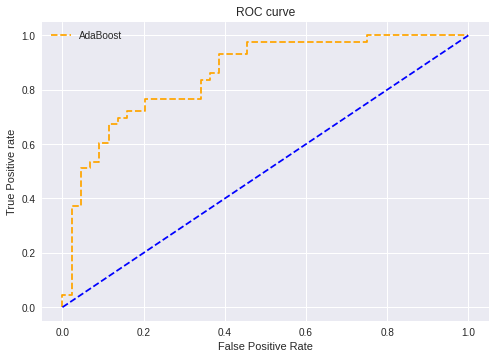

In [ ]:
pred_prob1 = ADA.predict_proba(xtest)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=2)

random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AdaBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();